# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('exch_rates.csv')
df['Frequency'] = pd.to_datetime(df['Frequency'])
df.set_index('Frequency', inplace=True)

In [21]:
df.info()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170
...,...,...,...
2018-11-22,0.876962,1.378672,6.543541
2018-11-23,0.880902,1.383721,6.573115
2018-11-24,NaN,NaN,NaN


Plot the three exchange rates in one plot

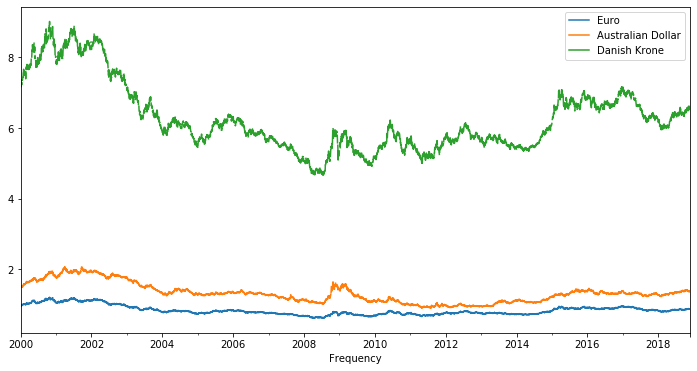

In [23]:
# your code here
df.plot(figsize=(12,6))

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [24]:
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

All of these currencies are highly correlated. Danish Krone and Euro are most correlated, probably because Denmark is in the EU. The Australian dollar is still strongly correlated to the other two, but not as much, since it is in a different part of the world and less driven by regional effects of the EU/europe.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [25]:
# your code here
df['Euro_diff'] = df['Euro'].diff()
df['Aus_diff'] = df['Australian Dollar'].diff()
df['Dan_diff'] = df['Danish Krone'].diff()

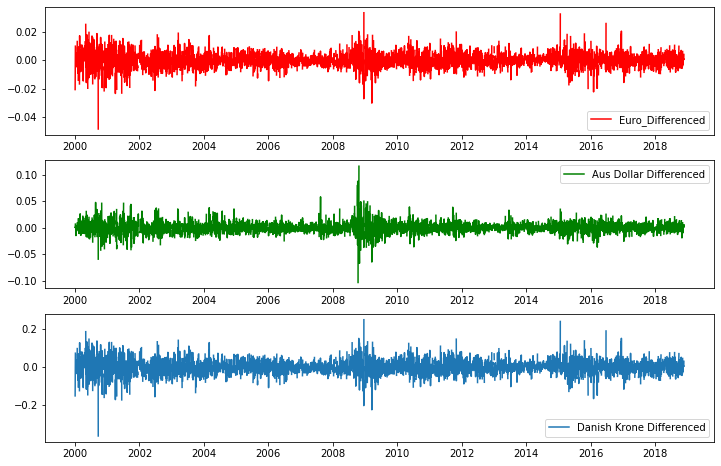

In [30]:
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(df['Euro_diff'], label='Euro_Differenced', color='red')
plt.legend()
plt.subplot(312)
plt.plot(df['Aus_diff'], label='Aus Dollar Differenced', color='green')
plt.legend()
plt.subplot(313)
plt.plot(df['Dan_diff'], label='Danish Krone Differenced')
plt.legend()
plt.show();

### Explain what's going on
By differencing these series, we have essentially removed the autocorrelation at lag 1. (Seasonality removed)

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [48]:
df['Euro_1'] = df['Euro'].shift(periods=1)
lag_1 = pd.concat([df['Euro'], df['Euro_1']], axis=1)

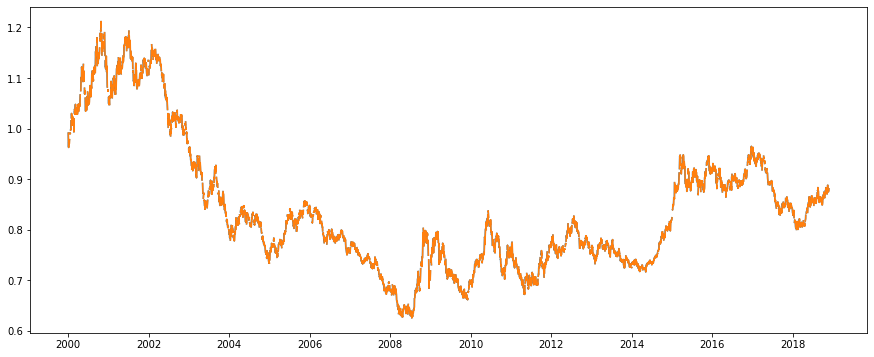

In [49]:
plt.figure(figsize=(15,6))
plt.plot(lag_1)
plt.show()

In [50]:
lag_1.corr()

,Euro,Euro_1
Euro,1.000000,0.999146
Euro_1,0.999146,1.000000


Repeat this, but for a "lag 50 autocorrelation"

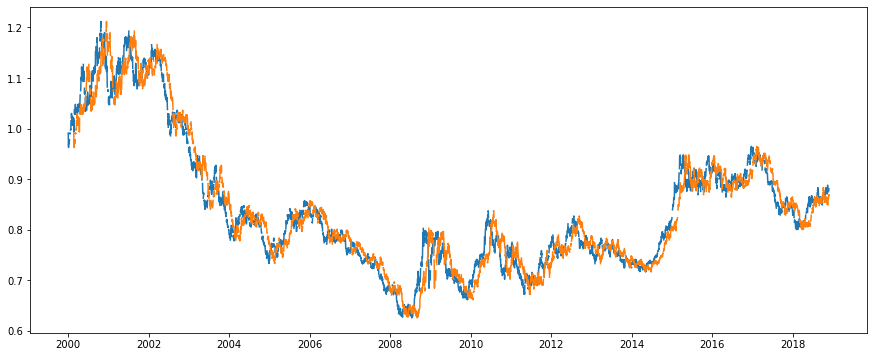

,Euro,Euro_50
Euro,1.000000,0.968321
Euro_50,0.968321,1.000000


In [51]:
df['Euro_50'] = df['Euro'].shift(periods=50)
lag_50 = pd.concat([df['Euro'], df['Euro_50']], axis=1)

plt.figure(figsize=(15,6))
plt.plot(lag_50)
plt.show()

lag_50.corr()

### What's your conclusion here?

The lag 1 correlation is nearly 1, which makes sense since a shift of 1 day isn't very much. A shift of 50 days still results in a strong correlation (0.97), but clearly less than for 1 day.

Knowing this, let's plot the ACF now.

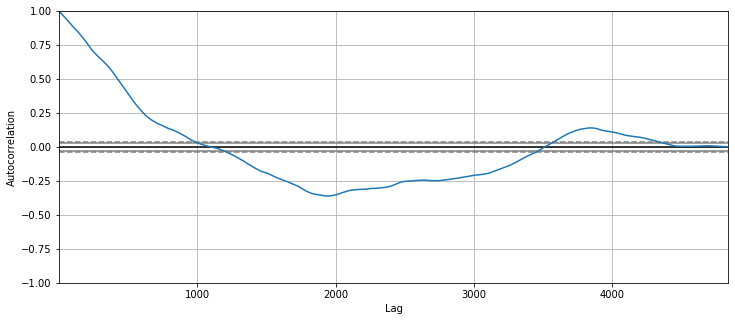

In [54]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df[['Euro']].dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

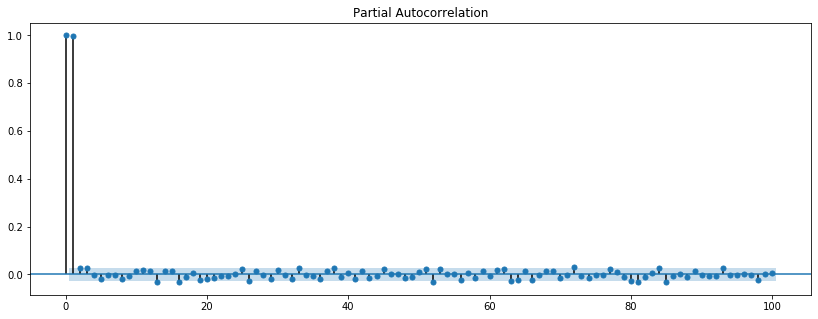

In [72]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(df[['Euro']].dropna(), lags = 100, method='ywm');

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [61]:
apd = pd.read_csv('passengers.csv')
apd['Month'] = pd.to_datetime(apd['Month'])
apd.set_index('Month', inplace=True)
apd.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

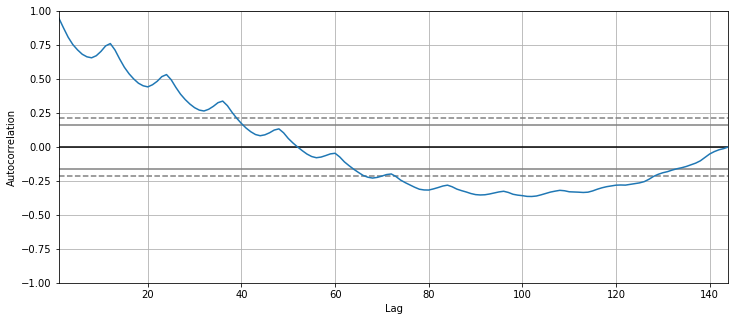

In [63]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(apd);

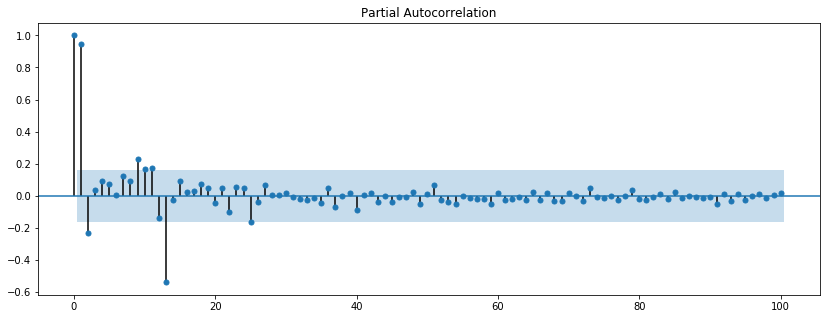

In [69]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(apd.dropna(), lags = 100, method='ywm');

In [78]:
apd_diff = apd.diff().dropna()

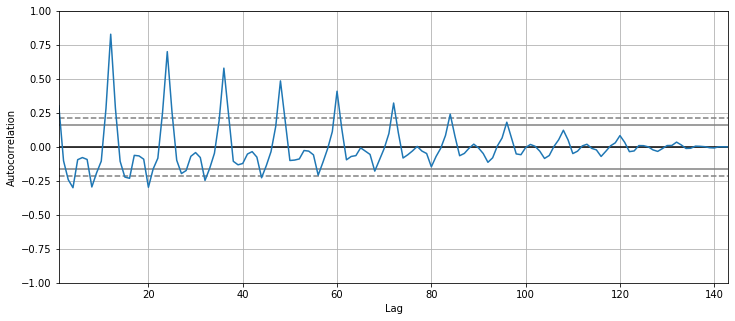

In [80]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(apd_diff);

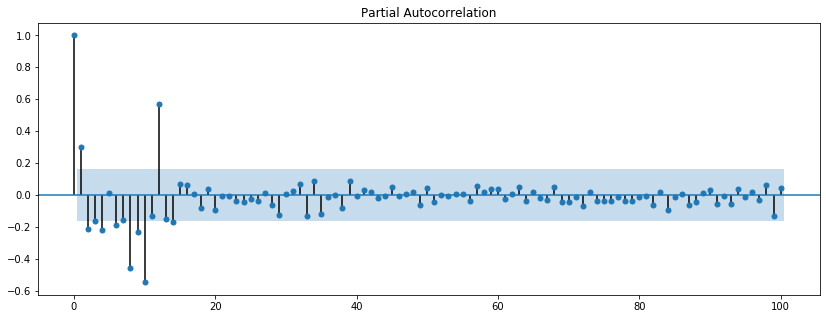

In [81]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(apd_diff, lags = 100, method='ywm');

A strong autocorrelation is visible at 12 months in differenced data - makes sense for travel patterns at different times of the year.

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [85]:
# your code here
stock = pd.read_csv('NYSE_monthly.csv')
stock.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [86]:
stock['Month'] = pd.to_datetime(stock['Month'])
stock.set_index('Month', inplace=True)
stock.index

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
      

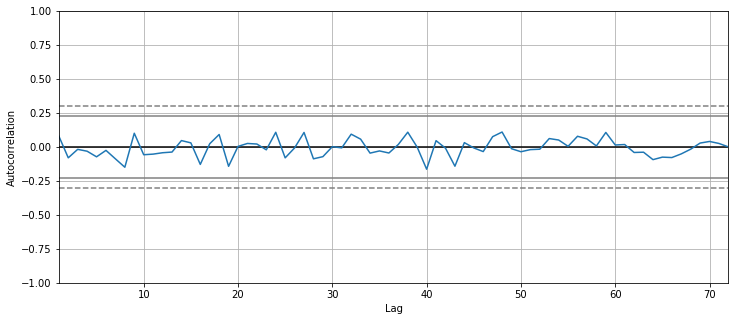

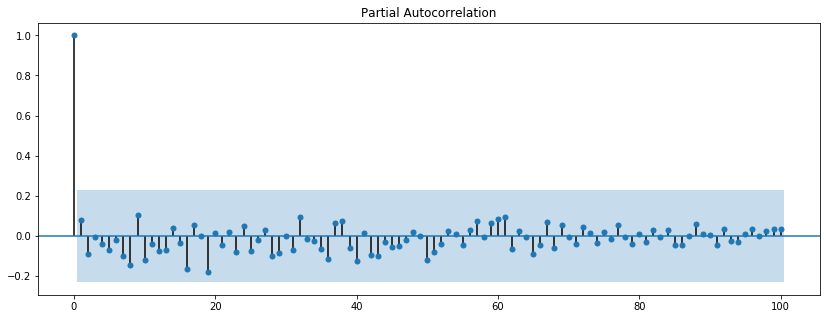

In [89]:
# Original time series ACF and partial ACF

plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(stock);

rcParams['figure.figsize'] = 14, 5
plot_pacf(stock, lags = 100, method='ywm');

## Your conclusion here

The NYSE time series has no real autocorrelation at any lag level. (White noise)



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!